In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import joblib

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/dsabdulla/Predict-pricing-airlines/main/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dsabdulla/Predict-pricing-airlines/main/test_data.csv')
sample_solution = pd.read_csv('https://raw.githubusercontent.com/dsabdulla/Predict-pricing-airlines/main/sample_solution.csv')
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


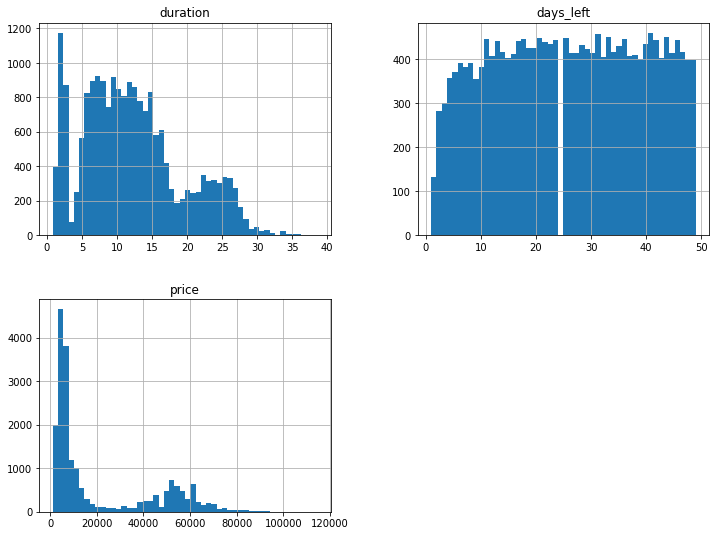

In [4]:
df.iloc[:,1:].hist(bins=50, figsize=(12,9))
plt.show()

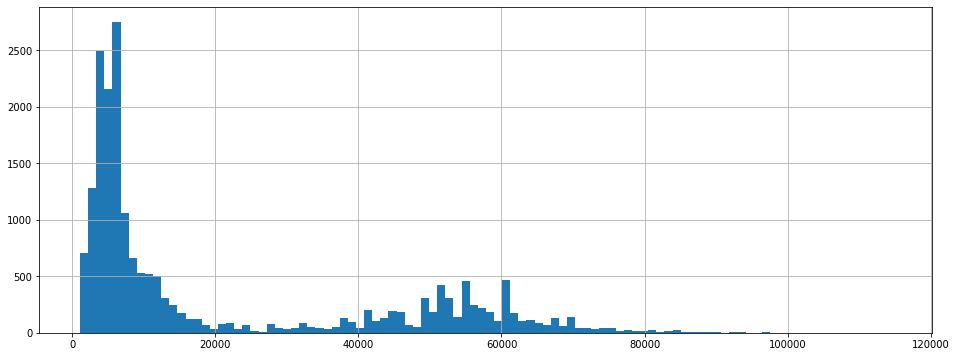

In [5]:
df['price'].hist(bins=100, figsize=(16,6))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=28)

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

cat_cols = ['airline','source_city','departure_time','arrival_time','destination_city']
num_cols = ['stops','class','duration','days_left']

# bizga kerak ustunlar indekslari
stops_ix, class_ix = 0, 1

stops_to_number = {'zero':0, 'one':1, 'two_or_more':2}
class_to_number = {'Economy':1, 'Business':2}

class ConvertertoNumber(BaseEstimator, TransformerMixin):
    def __init__(self, ConverttoNum = True):
        self.ConverttoNum = ConverttoNum
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        if self.ConverttoNum: # ConverttoNum ustuni ixtiyoriy bo'ladi
            X.iloc[:, stops_ix] = X.iloc[:, stops_ix].replace(stops_to_number)
            X.iloc[:, class_ix] = X.iloc[:, class_ix].replace(class_to_number)
            return X.values
        else:
            return X.values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('ConvertertoNum', ConvertertoNumber(ConverttoNum = True)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [9]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', OneHotEncoder(sparse=False), cat_cols)
])

In [10]:
X = train_set.drop("price", axis=1)
y = train_set['price'].copy()
y_test = test_set['price'].copy()

In [ ]:
X_prepared = full_pipeline.fit_transform(X)

In [ ]:
X_test_prepared = full_pipeline.fit_transform(test_set)

In [13]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_prepared, y)

LinearRegression()

In [14]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [15]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [16]:
y_LR_pred = LR_model.predict(X_test_prepared)
y_DT_pred = Tree_model.predict(X_test_prepared)
y_RF_pred = RF_model.predict(X_test_prepared)

In [17]:
# mean_squared_error
from sklearn.metrics import mean_squared_error
LR_rmse = np.sqrt(mean_squared_error(y_test, y_LR_pred))
DT_rmse = np.sqrt(mean_squared_error(y_test, y_DT_pred))
RF_rmse = np.sqrt(mean_squared_error(y_test, y_RF_pred))
print(f'{LR_rmse = }')
print(f'{DT_rmse = }')
print(f'{RF_rmse = }')

LR_rmse = 6607.724284294101
DT_rmse = 5381.025129883478
RF_rmse = 3970.7482780473247


Prediction

In [ ]:
test_prepared = full_pipeline.fit_transform(df_test)

In [42]:
test_RF_pred = RF_model.predict(test_prepared)

In [46]:
sample_solution.price = test_RF_pred
sample_solution.to_csv("pricing_airlines.csv", index=False)
sample_solution

,id,price
0,1,54151.74
1,2,56699.37
2,3,23460.36
3,4,2726.50
4,5,5889.81
...,...,...
4995,4996,59196.77
4996,4997,4467.05
4997,4998,50233.91
4998,4999,48696.36
